In [3]:
import numpy as np
import pandas as pd
import re

In [4]:
attacks1 = pd.read_csv("../../attack1.csv")
attacks1

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Date
0,0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,2018
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,2018
2,2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,2018
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,2018
4,4,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,1903
6298,6298,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,1903
6299,6299,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,1900-1905
6300,6300,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,1883-1889


In [5]:
attacks1.columns

Index(['Unnamed: 0', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'original order', 'Date'],
      dtype='object')

In [6]:
attacks1.isnull().sum()

Unnamed: 0                   0
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
original order               0
Date                        19
dtype: int64

In [7]:
attacks1 = attacks1.drop(columns=['Time','Species ','Investigator or Source', 'pdf', 'href formula', 'href','original order',"Age"])
attacks1

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Date
0,0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,2018
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,2018
2,2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,2018
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2018
4,4,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2018
...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,1903
6298,6298,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,1903
6299,6299,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,1900-1905
6300,6300,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,1883-1889


Voy a limpiar la columna de Sex. Antes de nada cambiarle el nombre

In [8]:
attacks1["Sex"]=attacks1["Sex "]

In [9]:
attacks1 = attacks1.drop(columns="Sex ")

In [10]:
attacks1["Sex"].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [11]:
attacks1["Sex"].isnull().sum()

565

In [12]:
attacks1["Sex"] = attacks1["Sex"].fillna("NoData")

In [13]:
attacks1["Sex"].isnull().sum()

0

In [14]:
attacks1["Sex"].value_counts()

M         5094
F          637
NoData     565
M            2
N            2
lli          1
.            1
Name: Sex, dtype: int64

In [15]:
attacks1.loc[attacks1["Sex"].str.startswith("M"),"Sex"] = "M"

In [16]:
attacks1["Sex"].value_counts()

M         5096
F          637
NoData     565
N            2
lli          1
.            1
Name: Sex, dtype: int64

In [17]:
def genre(value):
    value = re.sub(r"^[^MF].*","NoData",value)
    return value

attacks1["Sex_2"] = attacks1["Sex"].apply(genre)

In [18]:
attacks1["Sex_2"].value_counts()

M         5096
F          637
NoData     569
Name: Sex_2, dtype: int64

569 de 6302 son el 9% de los datos

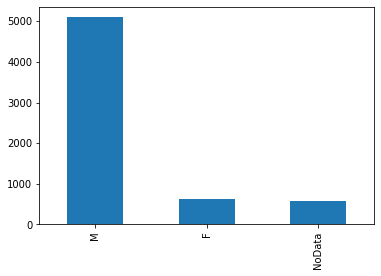

In [19]:
%matplotlib inline

attacks1["Sex_2"].value_counts().plot.bar()

A priori podría parecer que la carne de hombre es más apetecible para los tiburones. Sin embargo, vamos a comparar sex con date

In [20]:
attacks1["Date"] = attacks1["Date"].fillna("NoData")
attacks1["Date"].value_counts().sum()

6302

In [21]:
attacks1["Date"].value_counts()

2015                          143
2017                          137
2016                          131
2014                          128
2011                          127
                             ... 
1883 (probably happened Ca      1
1771                            1
1949-1950                       1
1868 (?)                        1
1952-1954                       1
Name: Date, Length: 321, dtype: int64

In [22]:
def date_fn(value):
    if (len(value)==4) | (value=="NoData"):
        return value
    else:
        pattern = r'\d{4}\-\d{4}.*'
        if re.match(pattern, value):
            value = value.split("-")
            value1 = value[0]
            value2 = value[1]
            value2 = re.search(r"^\d{4}", value2)
            value2 = value2.group()
            value = [int(value1),int(value2)]
            value_mean = int(sum(value)/len(value))
            return str(value_mean)
        else: 
            value = (re.search(r"^\d{4}", value)).group()
            return value


attacks1["Date_mod"] = attacks1["Date"].apply(date_fn)
attacks1["Date_mod"]

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297    1903
6298    1903
6299    1902
6300    1886
6301    1849
Name: Date_mod, Length: 6302, dtype: object

In [23]:
display(attacks1["Date_mod"].describe(), attacks1["Date_mod"].max(), attacks1["Date_mod"].min())
attacks1["Date_mod"].isnull().sum()

count     6302
unique     250
top       2015
freq       143
Name: Date_mod, dtype: object

'NoData'

'1543'

0

In [24]:
def date_int(value):
    if value == "NoData":
        return 0
    else:
        value = int(value)
        if value>2019:
            value=0
            return value
        else:
            return value

attacks1["Date_mod2"] = attacks1["Date_mod"].apply(date_int)

In [25]:
attacks1.loc[attacks1["Date_mod2"] == 0,"Date_mod2"] = np.nan
attacks1["Date_mod2"].isnull().sum()

20

In [26]:
attacks1["Date_mod2"].describe()

count    6282.000000
mean     1966.820917
std        48.478998
min      1543.000000
25%      1944.000000
50%      1978.000000
75%      2005.000000
max      2018.000000
Name: Date_mod2, dtype: float64

In [27]:
años = list(range(1539,2050,50))
años2 = list(range(1550,2020,50))
print(años)
print(años2)

[1539, 1589, 1639, 1689, 1739, 1789, 1839, 1889, 1939, 1989, 2039]
[1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000]


In [28]:
attacks1["Decada"] = pd.cut(attacks1["Date_mod2"],bins=años,labels=años2)

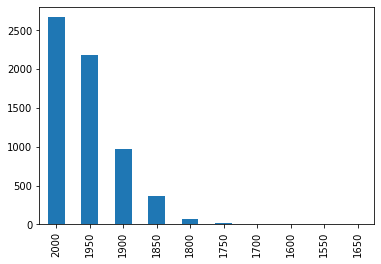

In [29]:
attacks1["Decada"].value_counts().plot.bar()

In [30]:
attacks1["Decada"].value_counts().reset_index().sort_values('index')

,index,Decada
8,1550,4
7,1600,5
9,1650,1
6,1700,8
5,1750,20
4,1800,65
3,1850,363
2,1900,967
1,1950,2180
0,2000,2669


Solo voy a tener en cuenta a partir de 1850, antes hay pocos casos registrados

In [31]:
attacks_sex_decade = attacks1[["Decada","Sex_2"]]
attacks_sex_decade

,Decada,Sex_2
0,2000,F
1,2000,F
2,2000,M
3,2000,M
4,2000,M
...,...,...
6297,1900,M
6298,1900,M
6299,1900,M
6300,1850,M


In [32]:
lessthan1850orNull =attacks_sex_decade[(attacks_sex_decade["Decada"].values < 1850)|(attacks_sex_decade["Decada"].values.isnull())].index
lessthan1850orNull

Int64Index([4078, 4644, 4802, 4838, 6071, 6072, 6073, 6074, 6075, 6076,
            ...
            6180, 6217, 6218, 6261, 6271, 6272, 6275, 6279, 6280, 6281],
           dtype='int64', length=123)

In [33]:
attacks_sex_decade_Transp = attacks_sex_decade.T

In [34]:
attacks_sex_decade_Transp = attacks_sex_decade_Transp.drop(columns=lessthan1850orNull)

In [35]:
attacks_sex_decade = attacks_sex_decade_Transp.T

In [36]:
attacks_sex_decade

,Decada,Sex_2
0,2000,F
1,2000,F
2,2000,M
3,2000,M
4,2000,M
...,...,...
6297,1900,M
6298,1900,M
6299,1900,M
6300,1850,M


In [37]:
attacks_sex_decade["hombre"] = np.where(attacks_sex_decade["Sex_2"].isin(["M"]), 1, 0)
attacks_sex_decade["hombre"] 

0       0
1       0
2       1
3       1
4       1
       ..
6297    1
6298    1
6299    1
6300    1
6301    1
Name: hombre, Length: 6179, dtype: int64

In [38]:
attacks_sex_decade["mujer"] = np.where(attacks_sex_decade["Sex_2"].isin(["F"]), 1, 0)
attacks_sex_decade["mujer"] 

0       1
1       1
2       0
3       0
4       0
       ..
6297    0
6298    0
6299    0
6300    0
6301    0
Name: mujer, Length: 6179, dtype: int64

In [39]:
attacks_sex_decade

,Decada,Sex_2,hombre,mujer
0,2000,F,0,1
1,2000,F,0,1
2,2000,M,1,0
3,2000,M,1,0
4,2000,M,1,0
...,...,...,...,...
6297,1900,M,1,0
6298,1900,M,1,0
6299,1900,M,1,0
6300,1850,M,1,0


In [40]:
nueva = pd.pivot_table(attacks_sex_decade,index=['Decada'],values=['hombre',"mujer"],aggfunc={'hombre': 'sum', "mujer": 'sum'})
nueva

,hombre,mujer
Decada,,
1850.0,323,12
1900.0,829,56
1950.0,1749,145
2000.0,2093,418


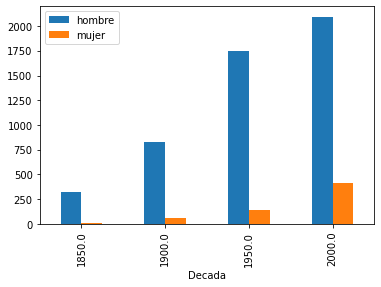

In [41]:
nueva.plot.bar()

In [42]:
nueva.sum()

hombre    4994
mujer      631
dtype: int64

In [43]:
nueva.hombre.sum()/(nueva.hombre.sum()+nueva.mujer.sum())

0.8878222222222222

In [44]:
lista = []
for i in range(4):
    print(nueva.hombre.iloc[i], nueva.iloc[i].sum(), nueva.hombre.iloc[i]/nueva.iloc[i].sum()*100)
    print(nueva.mujer.iloc[i], nueva.iloc[i].sum(), nueva.mujer.iloc[i]/nueva.iloc[i].sum()*100)
    lista.append((nueva.hombre.iloc[i]/nueva.iloc[i].sum()*100,nueva.mujer.iloc[i]/nueva.iloc[i].sum()*100))
    

323 335 96.41791044776119
12 335 3.582089552238806
829 885 93.67231638418079
56 885 6.3276836158192085
1749 1894 92.34424498416051
145 1894 7.655755015839494
2093 2511 83.35324571883712
418 2511 16.646754281162885


In [45]:
Decada = ["1850","1900","1950","2000"]

data = pd.DataFrame(lista, index = Decada,columns=["hombre","mujer"])

In [46]:
data

,hombre,mujer
1850,96.417910,3.582090
1900,93.672316,6.327684
1950,92.344245,7.655755
2000,83.353246,16.646754


In [47]:
nueva = pd.pivot_table(data,index=Decada,values=['hombre',"mujer"])
nueva

,hombre,mujer
1850,96.417910,3.582090
1900,93.672316,6.327684
1950,92.344245,7.655755
2000,83.353246,16.646754


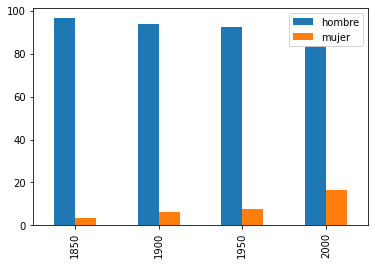

In [48]:
nueva.plot.bar()

In [49]:
attacks1["Activity"].value_counts()

Surfing                                971
Swimming                               869
Fishing                                431
Spearfishing                           333
Bathing                                162
                                      ... 
Fishing for yellowtail                   1
Walking in shallows                      1
Killing a shark                          1
Free diving for abalone (ascending)      1
Playing with an air mattress             1
Name: Activity, Length: 1532, dtype: int64

In [103]:
def activ(value):
    value = str(value)
    if value==None:
        return value
    elif re.search(r".*(s|S)urf.*", value):
        return "Water sports"
    elif re.search(r".*(p|P)addl(e|i).*",value):
        return "Water sports"
    elif re.search(r".*(b|B)oarding.*", value):
        return "Water sports"
    elif re.search(r".*(b|B)ath.*", value):
        return "Bathing"
    elif re.search(r".*(f|F)ish.*", value):
        return "Fishing"
    elif re.search(r".*(s|S)wim.*", value):
        return "Swimming"
    elif re.search(r".*(a|A)ir mattress.*",value):
        return "Bathing"
    elif re.search(r".*(f|F)loat.*",value):
        return "Bathing"
    elif re.search(r".*(d|D)iv(e|i).*",value):
        return "Diving"
    elif re.search(r".*(s|S)norkel.*",value):
        return "Snorkeling"
    elif re.search(r".*(s|S)hip.*",value):
        return "Ship/Boat"
    elif re.search(r".*(b|B)oat.*",value):
        return "Ship/Boat"
    elif re.search(r".*(w|W)reck.*",value):
        return "Ship/Boat"
    elif re.search(r".*(o|O)verboard.*",value):
        return "Ship/Boat"
    elif re.search(r".*(k|K)ayak.*",value):
        return "Kayaking"
    elif re.search(r".*(c|C)anoe.*",value):
        return "Kayaking"
    elif re.search(r".*(f|F)edd.*",value):
        return "Feeding sharks"
    elif re.search(r".*(a|A)ir.*disaster.*",value):
        return "Aircraft accident"
    elif re.search(r".*(a|A)ircraft.*",value):
        return "Aircraft accident"
    elif re.search(r".*(f|F)ilm.*",value):
        return "Film/photo sharks"
    elif re.search(r".*(p|P)hoto.*",value):
        return "Film/photo sharks"
    
    else:
        return value

attacks1["Activity2"] = attacks1["Activity"].apply(activ)
attacks1["Activity2"].value_counts()

Water sports                                                                          1428
Fishing                                                                               1191
Swimming                                                                              1089
nan                                                                                    544
Diving                                                                                 517
                                                                                      ... 
Crossing the river mouth                                                                 1
In waist-deep water                                                                      1
Lobstering                                                                               1
Explosion & sinking of the USS Juneau after being torpedoed by the submarine  I-85       1
Testing anti-shark cage                                                                  1

In [105]:
attacks1["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

544